# DATASET

```
# This is formatted as code
```



In [1]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.DataFrame(heart_disease.data.features)
print(df.shape)
df.head()

(303, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [ ]:
df['target'] = heart_disease.data.targets
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Preprocessing

## CHECKING FOR MISSING **VALUES**

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df['ca'].dtype
df['thal'].dtype

dtype('float64')

there is missing values in ca and thal

so we filll it with the median

In [ ]:
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)
print(df['ca'].median(),"\n",df['thal'].median())

0.0 
 3.0


/tmp/ipython-input-38838674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].median(), inplace=True)
/tmp/ipython-input-38838674.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
print('column name = data type')
for col in df.columns:
  print(f'{df[col].name} = {df[col].dtype}')

column name = data type
age = int64
sex = int64
cp = int64
trestbps = int64
chol = int64
fbs = int64
restecg = int64
thalach = int64
exang = int64
oldpeak = float64
slope = int64
ca = float64
thal = float64
target = int64


## Normalize numerical features (scale between 0–1)

In [ ]:
normalize_df = df[['age','trestbps','chol','thalach','oldpeak']]
normalize_df.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
m_normalize_df =  mms.fit_transform(normalize_df)
m_normalize_df = pd.DataFrame(m_normalize_df, columns=['age','trestbps','chol','thalach','oldpeak'])
m_normalize_df.head()

df = df.drop(['age','trestbps','chol','thalach','oldpeak'], axis=1)
df = pd.concat([df, m_normalize_df], axis=1)
df.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,age,trestbps,chol,thalach,oldpeak
0,1,1,1,2,0,3,0.0,6.0,0,0.708333,0.481132,0.244292,0.603053,0.370968
1,1,4,0,2,1,2,3.0,3.0,2,0.791667,0.622642,0.365297,0.282443,0.241935
2,1,4,0,2,1,2,2.0,7.0,1,0.791667,0.245283,0.235160,0.442748,0.419355
3,1,3,0,0,0,3,0.0,3.0,0,0.166667,0.339623,0.283105,0.885496,0.564516
4,0,2,0,2,0,1,0.0,3.0,0,0.250000,0.339623,0.178082,0.770992,0.225806


## Encode categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
le = LabelEncoder()

encode_df = df[['sex', 'fbs', 'exang']]
print(encode_df.head())

for col in encode_df:
  encode_df[col] = le.fit_transform(encode_df[col].astype(str))
df = df.drop(['sex', 'fbs', 'exang'], axis=1)
df = pd.concat([df, encode_df], axis=1)
df.head()

   sex  fbs  exang
0    1    1      0
1    1    0      1
2    1    0      1
3    1    0      0
4    0    0      0


/tmp/ipython-input-3851977985.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encode_df[col] = le.fit_transform(encode_df[col].astype(str))
/tmp/ipython-input-3851977985.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encode_df[col] = le.fit_transform(encode_df[col].astype(str))
/tmp/ipython-input-3851977985.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,cp,restecg,slope,ca,thal,target,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang
0,1,2,3,0.0,6.0,0,0.708333,0.481132,0.244292,0.603053,0.370968,1,1,0
1,4,2,2,3.0,3.0,2,0.791667,0.622642,0.365297,0.282443,0.241935,1,0,1
2,4,2,2,2.0,7.0,1,0.791667,0.245283,0.235160,0.442748,0.419355,1,0,1
3,3,0,3,0.0,3.0,0,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,0
4,2,2,1,0.0,3.0,0,0.250000,0.339623,0.178082,0.770992,0.225806,0,0,0


In [ ]:
one = OneHotEncoder()
encode_df = df[['cp', 'slope', 'thal', 'restecg', 'ca']]

df_cp = pd.get_dummies(encode_df, columns=['cp', 'slope', 'thal','restecg', 'ca'])
df_cp = df_cp.astype(int)
df_cp
df = df.drop(['cp', 'slope', 'thal', 'restecg','ca'], axis=1)
df = pd.concat([df, df_cp], axis=1)
df.head()

,target,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp_1,...,thal_3.0,thal_6.0,thal_7.0,restecg_0,restecg_1,restecg_2,ca_0.0,ca_1.0,ca_2.0,ca_3.0
0,0,0.708333,0.481132,0.244292,0.603053,0.370968,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
1,2,0.791667,0.622642,0.365297,0.282443,0.241935,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,1,0.791667,0.245283,0.235160,0.442748,0.419355,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,0,0.250000,0.339623,0.178082,0.770992,0.225806,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
# mocving target to last
df = df.drop(['target'], axis=1)
df['target'] = heart_disease.data.targets
df.head()

df['target'] = df['target'].apply(lambda x:1 if x> 0 else 0)
print(df['target'].value_counts())
df.head()

target
0    164
1    139
Name: count, dtype: int64


,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp_1,cp_2,...,thal_6.0,thal_7.0,restecg_0,restecg_1,restecg_2,ca_0.0,ca_1.0,ca_2.0,ca_3.0,target
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,1,0,1,0,...,1,0,0,0,1,1,0,0,0,0
1,0.791667,0.622642,0.365297,0.282443,0.241935,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
2,0.791667,0.245283,0.235160,0.442748,0.419355,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0.250000,0.339623,0.178082,0.770992,0.225806,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


## checking is data is normalize

In [ ]:

for col in df:
  print(f'{col} = {df[col].min()} to {df[col].max()}')

age = 0.0 to 0.9999999999999999
trestbps = 0.0 to 1.0
chol = 0.0 to 0.9999999999999998
thalach = 0.0 to 0.9999999999999999
oldpeak = 0.0 to 1.0
sex = 0 to 1
fbs = 0 to 1
exang = 0 to 1
cp_1 = 0 to 1
cp_2 = 0 to 1
cp_3 = 0 to 1
cp_4 = 0 to 1
slope_1 = 0 to 1
slope_2 = 0 to 1
slope_3 = 0 to 1
thal_3.0 = 0 to 1
thal_6.0 = 0 to 1
thal_7.0 = 0 to 1
restecg_0 = 0 to 1
restecg_1 = 0 to 1
restecg_2 = 0 to 1
ca_0.0 = 0 to 1
ca_1.0 = 0 to 1
ca_2.0 = 0 to 1
ca_3.0 = 0 to 1
target = 0 to 1


# Exploratory Data Analysis (EDA):

In [ ]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp_1,cp_2,...,thal_6.0,thal_7.0,restecg_0,restecg_1,restecg_2,ca_0.0,ca_1.0,ca_2.0,ca_3.0,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.355564,0.275555,0.600055,0.167678,0.679868,0.148515,0.326733,0.075908,0.165017,...,0.059406,0.386139,0.498350,0.013201,0.488449,0.594059,0.214521,0.125413,0.066007,0.458746
std,0.188305,0.166035,0.118212,0.174618,0.187270,0.467299,0.356198,0.469794,0.265288,0.371809,...,0.236774,0.487668,0.500824,0.114325,0.500693,0.491886,0.411169,0.331734,0.248704,0.499120
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.245283,0.194064,0.477099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,0.339623,0.262557,0.625954,0.129032,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.433962,0.340183,0.725191,0.258065,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


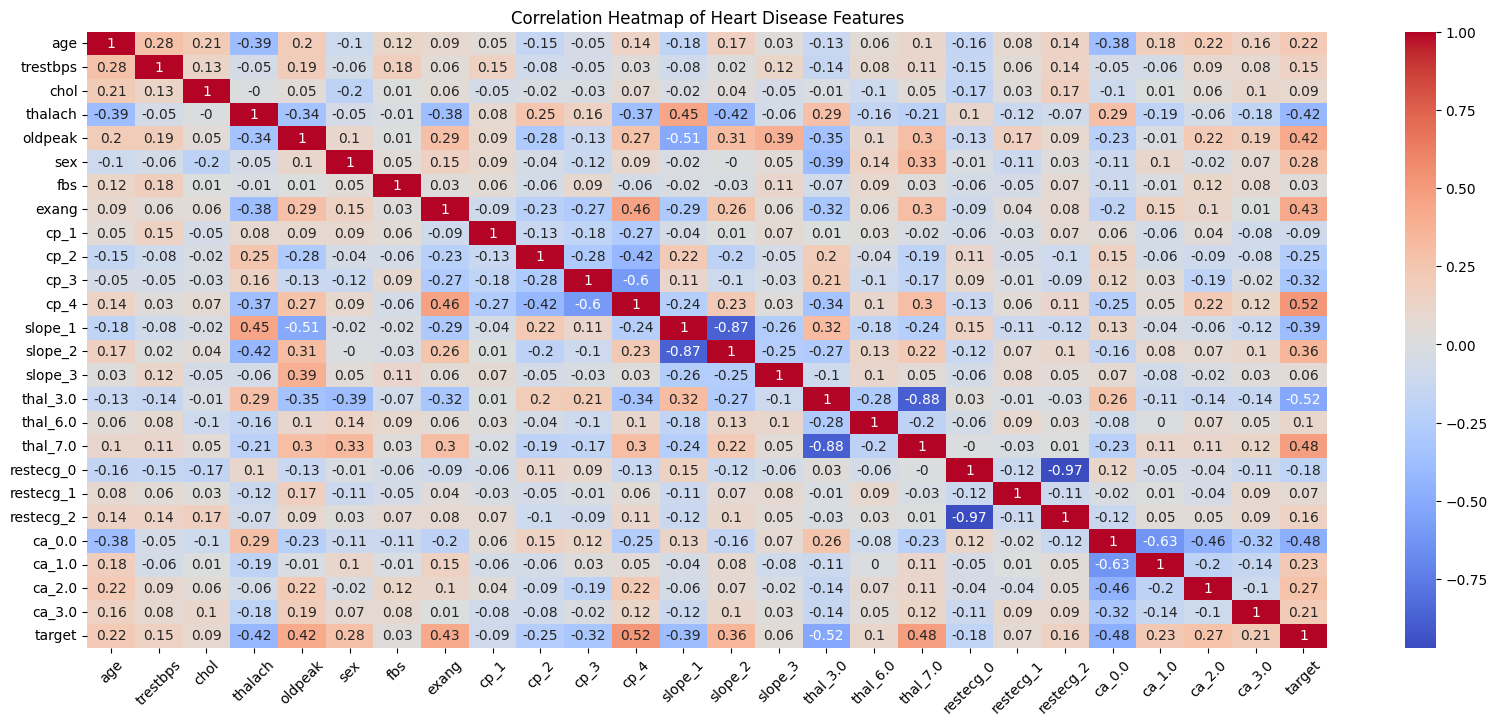

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr().round(2), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Heart Disease Features")
plt.xticks(rotation = 45)
plt.show()

# Model Training

## Data Spliting

In [ ]:
X = df.drop(['target'], axis=1)
y = df['target']
df

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp_1,cp_2,...,thal_6.0,thal_7.0,restecg_0,restecg_1,restecg_2,ca_0.0,ca_1.0,ca_2.0,ca_3.0,target
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,1,0,1,0,...,1,0,0,0,1,1,0,0,0,0
1,0.791667,0.622642,0.365297,0.282443,0.241935,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
2,0.791667,0.245283,0.235160,0.442748,0.419355,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0.250000,0.339623,0.178082,0.770992,0.225806,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,0.150943,0.315068,0.465649,0.193548,1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,1
299,0.812500,0.471698,0.152968,0.534351,0.548387,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,1
300,0.583333,0.339623,0.011416,0.335878,0.193548,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,1
301,0.583333,0.339623,0.251142,0.786260,0.000000,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print(y_pred_lr)

[0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0]


In [ ]:
from sklearn .metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


lr_acc = accuracy_score(y_test, y_pred_lr)
lr_pre = precision_score(y_test, y_pred_lr)
lr_rec = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("By Using LogisticRegression")
print("accuracy score =  ", lr_acc)
print('presion score = ', lr_pre)
print('recall score = ', lr_acc)
print('f1 score = ', lr_f1)
print("confusion matrix =  \n", confusion_matrix(y_test, y_pred_lr))

By Using LogisticRegression
accuracy score =   0.8688524590163934
presion score =  0.9
recall score =  0.8688524590163934
f1 score =  0.8709677419354839
confusion matrix =  
 [[26  3]
 [ 5 27]]


## Random forest Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(y_pred_rf)

[0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0]


In [ ]:
from sklearn .metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_pre = precision_score(y_test, y_pred_rf)
rf_rec = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
print("By Using RandomForestClassifier")
print("accuracy score =  ", rf_acc)
print('presion score = ', rf_pre)
print('recall score = ', rf_rec)
print('f1 score = ', rf_f1)
print("confusion matrix =  \n", confusion_matrix(y_test, y_pred_rf))

By Using RandomForestClassifier
accuracy score =   0.8852459016393442
presion score =  0.9032258064516129
recall score =  0.875
f1 score =  0.8888888888888888
confusion matrix =  
 [[26  3]
 [ 4 28]]


In [ ]:
if (lr_acc > rf_acc) & (lr_pre > rf_pre) & (lr_rec > rf_rec) & (lr_f1 > rf_f1) :
  print("Logistic Regression is better")
else:
  print("Random Forest is better")

Random Forest is better


# Comparison & Conclusion

Accuracy: Random Forest wins (88.5% vs 86.9%).

Recall: Random Forest wins (87.5% vs 84.4%) → fewer missed disease cases.

F1 Score: Random Forest wins (0.889 vs 0.871).

Confusion Matrix:

Logistic missed 5 patients with disease (FN).

Random Forest missed only 4.

👉 Final Choice: ✅ Random Forest Classifier is the better model here.

“Random Forest performed better than Logistic Regression with higher accuracy (88.5% vs 86.9%) and recall (87.5% vs 84.4%). Thus, Random Forest was selected as the final model.”